In [2]:
def stepwise_iterations(n,k, forward=True):
    if forward:
        return sum((n-i) for i in range(k))
    else:
        return sum((n-i) for i in range(n-k))
    
def iter_count(heuristic, n, k):
    if "Variable Flooring" in heuristic:
        return 1
    elif "Backward Stepwise Regression" in heuristic:
        return stepwise_iterations(n,k, forward=False)
    else:
        return stepwise_iterations(n,k, forward=True)
    
import math
def possible_solutions(n,k):
    return math.comb(n,k)

def possible_tree_size(n,k):
    return 2 * math.comb(n,k) - 1
    
print(f"{stepwise_iterations(500,10):,}")
print(f"{stepwise_iterations(500,10,forward=False):,}")
print(f"{possible_solutions(500,10):,}")
print(f"{possible_tree_size(500,10):,}")

4,955
125,195
245,810,588,801,891,098,700
491,621,177,603,782,197,399


/var/folders/nv/fbl0kxf95nj0krqsjrxv76z80000gn/T/ipykernel_94836/3618132372.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


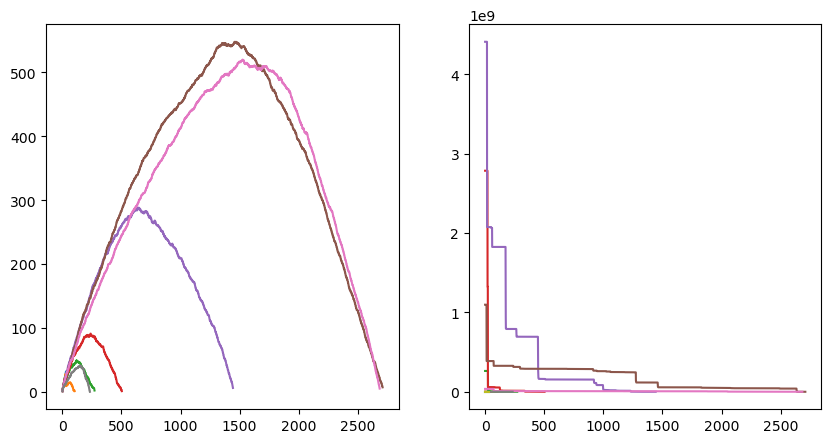

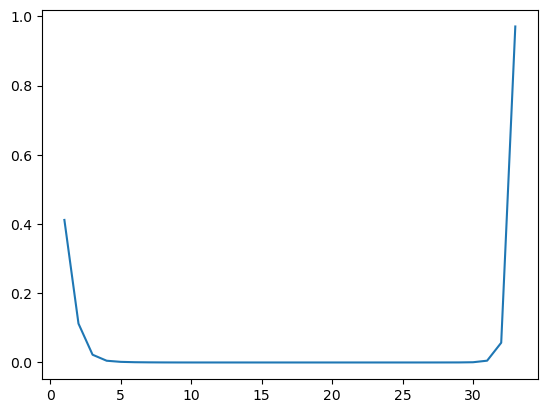

In [35]:

import pandas as pd
import matplotlib.pyplot as plt

# For Ionosphere n = 34
k_vals = []
iteration_count = []
solution_fraction = []

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

n=34
for k in sorted(range(1,34), reverse=True):
    actual_data = pd.read_csv(f"/Users/jamesjones/Research_Weijun/LogRegpy/tests/test_data/test_IONOSPHERE_MOSEK_Least Fractional_No Heuristic_{k}.csv")
    if k%4 == 0:
        ax[0].plot(actual_data["iteration"], actual_data["num_subproblems"], label=str(k))
        ax[1].plot(actual_data["iteration"], actual_data["remaining_tree_size"], label=str(k))
    k_vals.append(k)
    iteration_count.append(actual_data['iteration'].max())
    solution_fraction.append(actual_data['iteration'].max() / possible_solutions(n,k))
    
    #break

    
fig.show()

plt.plot(k_vals, iteration_count)
plt.show()

plt.plot(k_vals, solution_fraction)
plt.show()



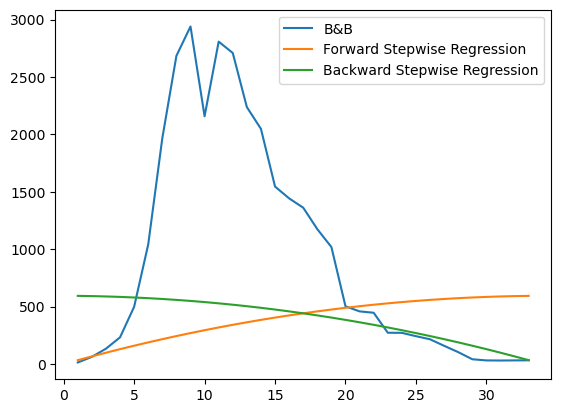

In [24]:

import pandas as pd
import matplotlib.pyplot as plt

# For Ionosphere n = 34

n=34

k_vals = []
solve_iters = []
forward_solve_iters = []
backward_solve_iters = []

for k in sorted(range(1,34), reverse=True):
    actual_data = pd.read_csv(f"/Users/jamesjones/Research_Weijun/LogRegpy/tests/test_data/test_IONOSPHERE_MOSEK_Least Fractional_No Heuristic_{k}.csv")
    k_vals.append(k)
    solve_iters.append(actual_data['iteration'].max())
    forward_solve_iters.append(stepwise_iterations(n,k))
    backward_solve_iters.append(stepwise_iterations(n,k,forward=False))
    # print(heuristic_data.head())
    # print(actual_data.head())
    
#     plt.plot(actual_data["iteration"], (actual_data["UB"] - actual_data["LB"]) / actual_data["LB"], label = f"{k}")

# plt.legend()
# plt.show()


    
plt.plot(k_vals, solve_iters, label="B&B")
plt.plot(k_vals, forward_solve_iters, label="Forward Stepwise Regression")
plt.plot(k_vals, backward_solve_iters, label="Backward Stepwise Regression")
plt.legend()
plt.show()



/var/folders/nv/fbl0kxf95nj0krqsjrxv76z80000gn/T/ipykernel_30204/2685814165.py:77: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


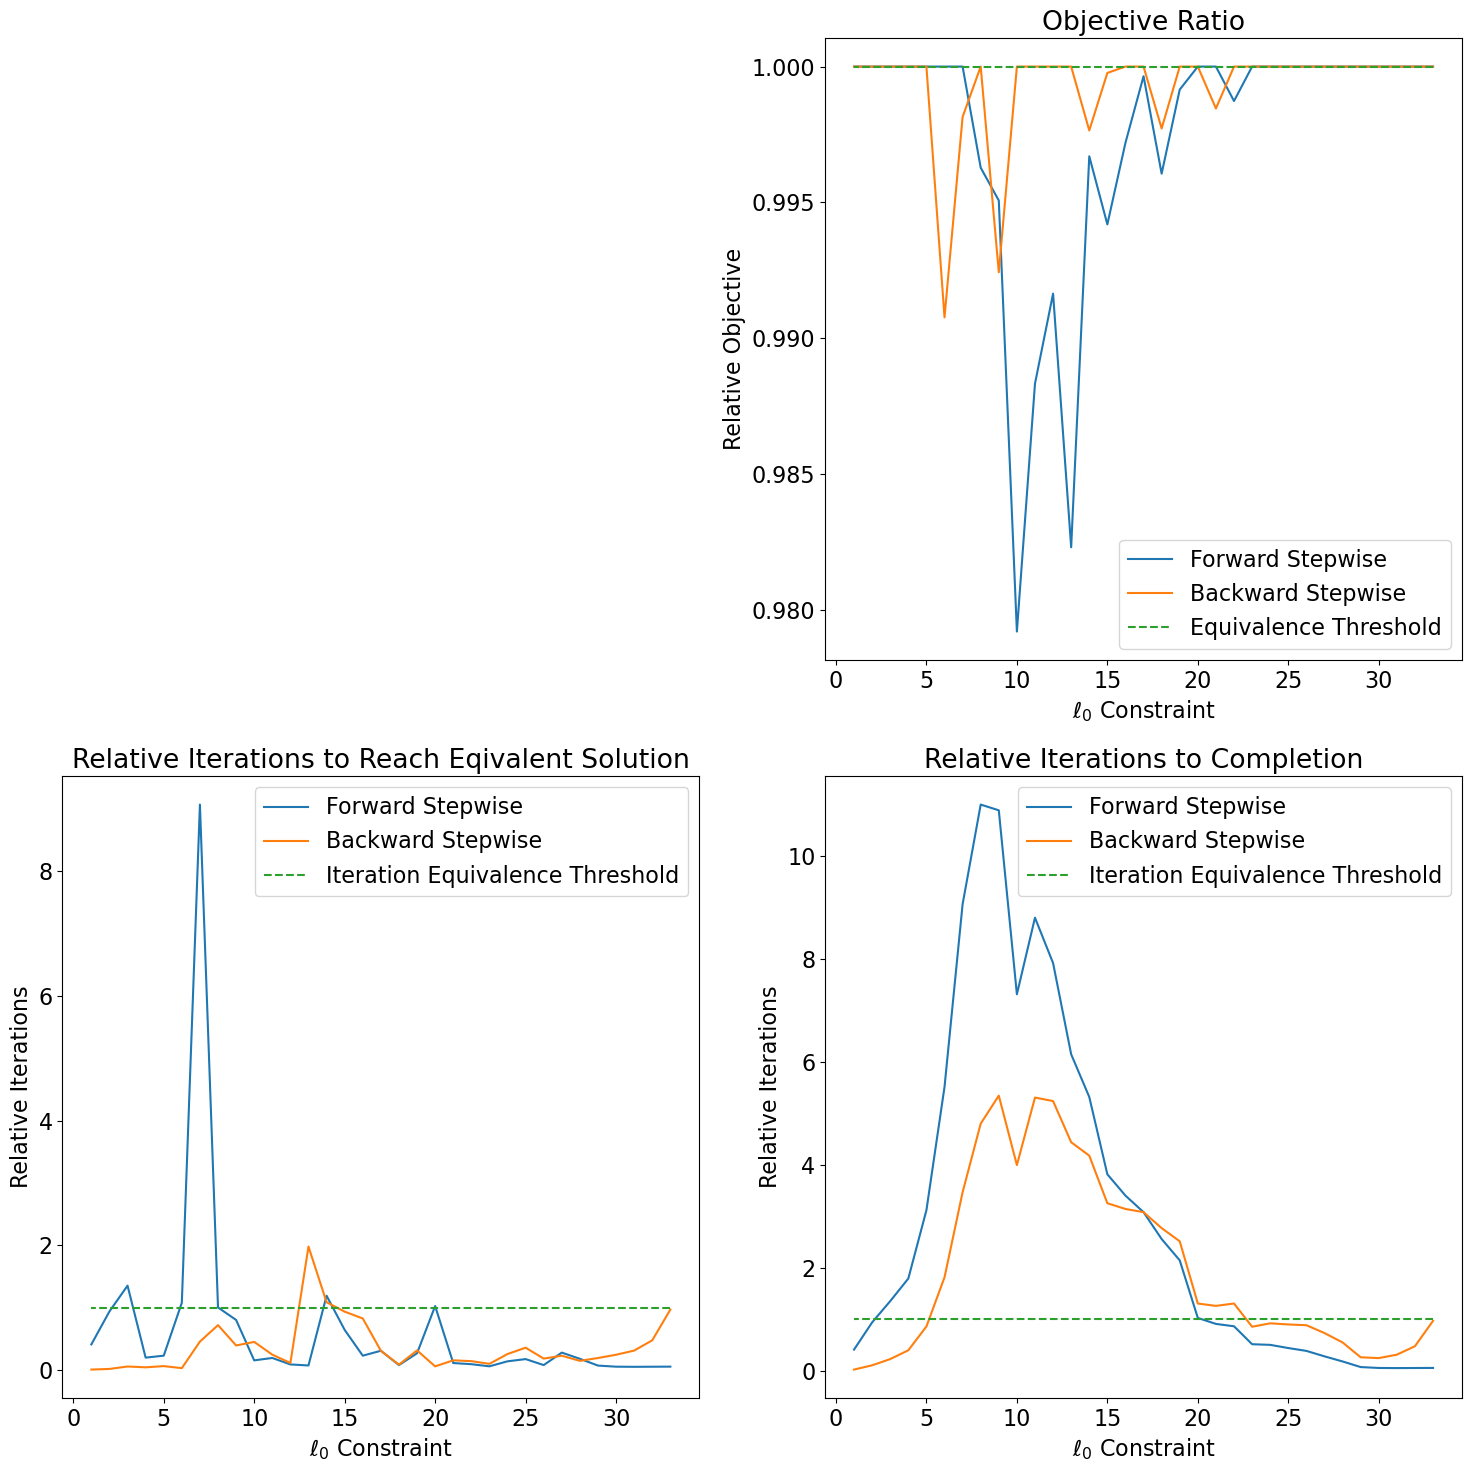

In [12]:

import pandas as pd
import matplotlib.pyplot as plt

# For Ionosphere n = 34

n=34

k_vals = []
forward_solve_epochs = []
backward_solve_epochs = []

forward_complete_epochs = []
backward_complete_epochs = []

forward_optimality_ratio = []
backward_optimality_ratio = []

for k in sorted(range(1,34), reverse=True):
    actual_data = pd.read_csv(f"/Users/jamesjones/Research_Weijun/LogRegpy/tests/test_data/test_IONOSPHERE_MOSEK_Least Fractional_No Heuristic_{k}.csv")
    heuristic_data = pd.read_csv(f"/Users/jamesjones/Research_Weijun/LogRegpy/tests/heuristic_test_data/IONOSPHERE_{k}")
    heuristic_data['Iterations'] = heuristic_data["Heuristic"].apply(lambda h: iter_count(h, n=n, k=k))
    k_vals.append(k)

    for i,row in heuristic_data.iterrows():
        if row["Heuristic"] == "Backward Stepwise Regression No Penalty":
            backward_solve_epochs.append(actual_data[actual_data["UB"] <= row["UB"]]["iteration"].min() / row["Iterations"])
            backward_complete_epochs.append(actual_data["iteration"].max() / row["Iterations"])
            backward_optimality_ratio.append(actual_data["UB"].min() / row["UB"])
        elif row["Heuristic"] == "Forward Stepwise Regression No Penalty":
            if actual_data["UB"].min() < row["UB"]:
                forward_solve_epochs.append(actual_data[actual_data["UB"] <= row["UB"]]["iteration"].min() / row["Iterations"])
            else:
                forward_solve_epochs.append(actual_data["iteration"].max() / row["Iterations"])
            forward_complete_epochs.append(actual_data["iteration"].max() / row["Iterations"])
            forward_optimality_ratio.append(actual_data["UB"].min() / row["UB"])
    # if k%5 ==0:            
    #     plt.plot(actual_data["iteration"], (actual_data["UB"] - actual_data["LB"]) / actual_data["LB"], label = f"{100*k/34:.0f}%")

    # print(heuristic_data.head())
    # print(actual_data.head())
    
#     plt.plot(actual_data["iteration"], (actual_data["UB"] - actual_data["LB"]) / actual_data["LB"], label = f"{k}")

# plt.legend()
# plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 15))  # 10 inches wide, 4 inches tall

axes[1,0].plot(k_vals, forward_solve_epochs, label="Forward Stepwise")
axes[1,0].plot(k_vals, backward_solve_epochs, label="Backward Stepwise")
axes[1,0].plot(k_vals, [1 for _ in k_vals], label = "Iteration Equivalence Threshold", linestyle='dashed')
axes[1,0].legend()
axes[1,0].set_title("Relative Iterations to Reach Eqivalent Solution")
axes[1,0].set_xlabel(r"$\ell_0$ Constraint")
axes[1,0].set_ylabel("Relative Iterations")

axes[1,1].plot(k_vals, forward_complete_epochs, label="Forward Stepwise")
axes[1,1].plot(k_vals, backward_complete_epochs, label="Backward Stepwise")
axes[1,1].plot(k_vals, [1 for _ in k_vals], label = "Iteration Equivalence Threshold", linestyle='dashed')
axes[1,1].legend()
axes[1,1].set_title("Relative Iterations to Completion")
axes[1,1].set_xlabel(r"$\ell_0$ Constraint")
axes[1,1].set_ylabel("Relative Iterations")

axes[0,1].plot(k_vals, forward_optimality_ratio, label="Forward Stepwise")
axes[0,1].plot(k_vals, backward_optimality_ratio, label="Backward Stepwise")
axes[0,1].plot(k_vals, [1 for _ in k_vals], label = "Equivalence Threshold", linestyle='dashed')
axes[0,1].legend()
axes[0,1].set_title("Objective Ratio")
axes[0,1].set_xlabel(r"$\ell_0$ Constraint")
axes[0,1].set_ylabel("Relative Objective")

axes[0,0].axis('off')
plt.rcParams.update({'font.size': 16}) 

plt.tight_layout()
fig.show()

